In [1]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.datasets import load_files
import pandas as pd
import numpy as np
from function import str_to_list
import re

In [3]:
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
th_stop_origin = tuple(thai_stopwords())

In [4]:
df = pd.read_csv('csv/new_data.csv')
size = df.shape[0]


Data Preparation

In [5]:
def text_process(text):
    text = re.sub("\[|\]|'|,"," ",text)
    return text
    
df['text_replace'] = df['text'].apply(text_process)
df

,post_type,text,text_replace
0,3,"['หา', 'สัญญา', 'หอ', 'มจพ', 'ย้าย', 'ปลาย', '...",หา สัญญา หอ มจพ ย้าย ปลาย ...
1,1,"['ขาย', 'ตั๋วหนัง', 'black', 'panther', 'โรง',...",ขาย ตั๋วหนัง black panther โรง ...
2,1,"['อนุญาต', 'ขาย', 'ขาย', 'ตู้', 'เย็น', 'Midea...",อนุญาต ขาย ขาย ตู้ เย็น Midea...
3,1,"['XX', 'คน', 'เช่า', 'XX', 'อนุญาต', 'ประกาศ',...",XX คน เช่า XX อนุญาต ประกาศ ...
4,1,"['ขาย', 'สัญญา', 'หอ', 'หมู่บ้าน', 'สิ', 'ริน'...",ขาย สัญญา หอ หมู่บ้าน สิ ริน ...
...,...,...,...
1403,1,"['ขาย', 'สัญญา', 'S9', 'Residence', 'ชั้น', '9...",ขาย สัญญา S9 Residence ชั้น 9...
1404,3,"['แนว', 'ข้อ', 'สอบ', 'รอบ', 'สอบตรง', 'สำหรับ...",แนว ข้อ สอบ รอบ สอบตรง สำหรับ...
1405,0,"['คน', 'ลืม', 'ศาลยีราฟ', 'ฝาก', 'ร้าน', 'ถ่าย...",คน ลืม ศาลยีราฟ ฝาก ร้าน ถ่าย...
1406,3,"['พี่', 'คน', 'รอบ', '2', 'สอบ', 'ข้อ', 'แนะนำ...",พี่ คน รอบ 2 สอบ ข้อ แนะนำ...


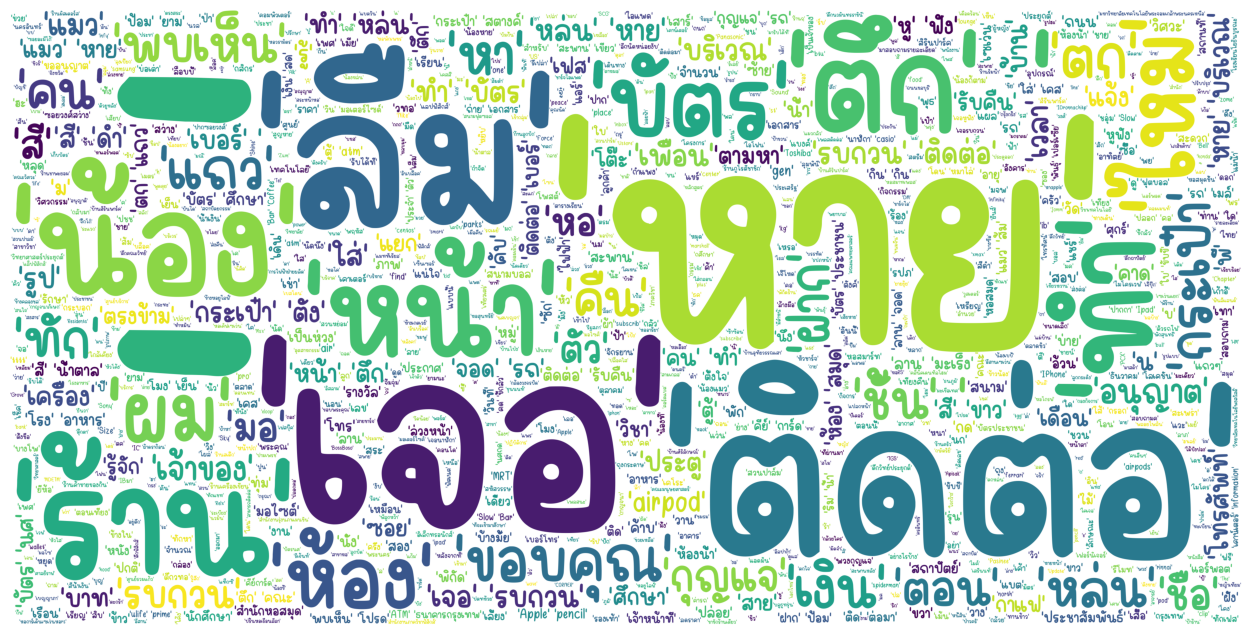

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['post_type'] == 0]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df_pos = df[df['post_type'] == 1]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df_pos = df[df['post_type'] == 3]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [6]:
X = df['text_replace']
y = df["post_type"]

In [5]:
X[0]

'  หา    สัญญา    หอ    มจพ    ย้าย    ปลาย    พฤศ    จิ    ธันวา    เรท    ราคา    ห้อง    6000    บาท  '

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
  ngram_range=(2, 4),              # อยากวิเคราะห์แบบ 2 และ 3 คำ ติดกัน
  min_df=5,                        # ขั้นต่ำของ Doc Freq ของ Term
  max_features=3000,               # ใช้แค่ 3,000 Term แรก
  decode_error='ignore'
  )
X_train_vectorized = vectorizer.fit_transform(X_train)

In [12]:
first_vector_tfidfvectorizer=X_train_vectorized[0] 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names_out(), columns=["tfidf"])

In [22]:
print(type(list(vectorizer.vocabulary_)))
data = list(vectorizer.vocabulary_)
for i in data:
    print(i)
print(type(vectorizer.idf_))

<class 'list'>
หา ญญา
ญญา หอ
เด อน
ขาย ญญา
ญญา หอพ
2566 อง
อน ดท
ดท าย
ไม อง
าย อง
อง เต
เต ยง
ยง แอร
เส อผ
การ ใบ
ระเบ ยง
อง ดต
ขาย ญญา หอพ
เด อน ดท
อน ดท าย
เต ยง แอร
เด อน ดท าย
ญญา เด
มอเตอร ไซค
จอด รถ
รถ ยนต
ขาย ญญา หอ
ญญา เด อน
จอด รถ ยนต
แบ ขาย
apple pencil
pencil 230
230 บาท
ใช ได
มอ มอ
pencil 230 บาท
วงศ สว
สว าง
วงศ สว าง
ปล อย
อย ตร
ปล อย ตร
ขออน ญาต
บาท ราคา
สนใจ inbox
inbox สอบถาม
สนใจ inbox สอบถาม
เจอ กระเป
เหม อน
ตร นศ
เด ยว
สอบถาม เร
เร ยน
ทำ หล
หล หาย
ดต เฟส
หอ เด
อน มกราคม
รายละเอ ยด
หอ เด อน
เด อน มกราคม
ทำ เร
เร อง
ทำ เร อง
เพ อน
เจอ ดต
ขอบค วงหน
ซอย 11
เช คอนโด
26 ตรม
อง 26
ตรม อง
อง นอน
นอน องน
ยด อง
อง เคร
เคร อง
อง ไฟฟ
เย ไมโครเวฟ
ไมโครเวฟ เคร
อง ทำ
ทำ แอร
แอร เคร
ราคา เช
บาท ญญา
ญญา เช
อำนวย สะดวก
สระ าย
าย ตเนส
กล อง
อง วงจรป
key card
อง สม
สถานท ใกล
ใกล เค
เค ยง
มหาว ทยาล
รถ เมล
ดต สอบถาม
อง 26 ตรม
26 ตรม อง
อง นอน องน
รายละเอ ยด อง
อง เคร อง
เคร อง ไฟฟ
ไมโครเวฟ เคร อง
เคร อง ทำ
อง ทำ แอร
แอร เคร อง
สระ าย ตเนส
กล อง วงจรป
สถานท ใกล เค
ใกล เค ยง
อง 26 ตรม อง


Built model

In [27]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB(alpha=1.0, fit_prior=True)
# transform the list of text to tf-idf before passing it to the model
cls.fit(vectorizer.fit_transform(X_train), y_train)
 
from sklearn.metrics import classification_report, accuracy_score
 
y_pred = cls.predict(vectorizer.fit_transform(X_test))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5568181818181818
              precision    recall  f1-score   support

           0       0.44      0.25      0.31        57
           1       0.54      0.33      0.41       125
           3       0.58      0.83      0.68       170

    accuracy                           0.56       352
   macro avg       0.52      0.47      0.47       352
weighted avg       0.54      0.56      0.52       352



In [15]:
import pickle

filename = "./model/check_type.sav"
filenamevec = "./model/vectorizer.sav"

#save model
pickle.dump(cls,open(filename,"wb"))
pickle.dump(vectorizer,open(filenamevec,"wb"))
